In [1]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
import numpy as np
import unicodedata
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import JSON
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Dharti
[nltk_data]     Navadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Dharti
[nltk_data]     Navadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('YT.csv')

# Data Visualization

Text(0.5, 1.0, 'Top 30 less Viewed Videos')

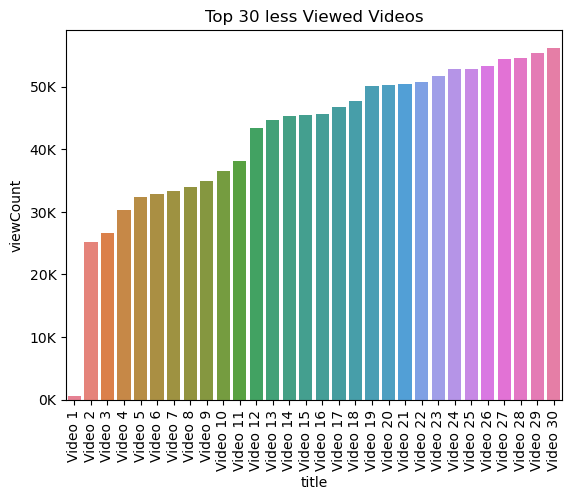

In [4]:
ax = sns.barplot(x='title', y='viewCount', hue='title', data=df.sort_values('viewCount', ascending=True)[0:30], palette="husl", legend=False)
ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels([f"Video {i+1}" for i in range(30)], rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
ax.set_title('Top 30 less Viewed Videos')

Text(0.5, 1.0, 'Top 30 Most Viewed Videos')

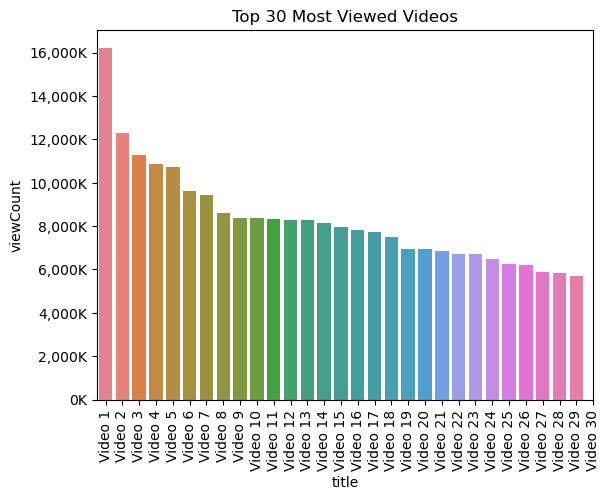

In [5]:
ax = sns.barplot(x='title', y='viewCount', hue='title', data=df.sort_values('viewCount', ascending=False)[0:30], palette="husl", legend=False)
ax.set_xticks(range(30))
ax.set_xticklabels([f"Video {i+1}" for i in range(30)], rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
ax.set_title('Top 30 Most Viewed Videos')

Text(0, 0.5, 'Count of Videos')

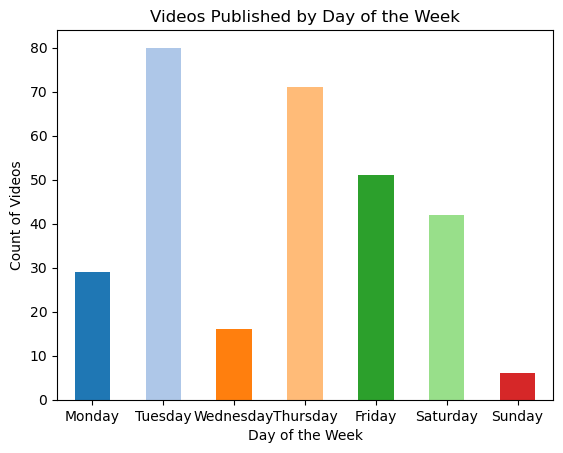

In [6]:
day_df = pd.DataFrame(df['publishedAt_day'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = df['publishedAt_day'].value_counts().reindex(weekdays)
ax = day_df.plot.bar(rot=0, color=plt.cm.tab20(range(len(day_df))))
ax.set_title('Videos Published by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count of Videos')

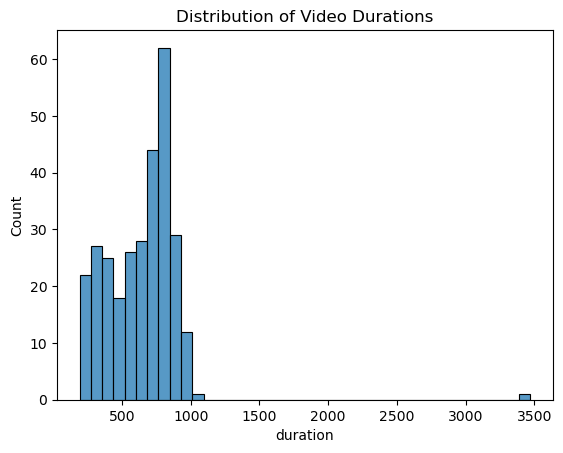

In [7]:
sns.histplot(data = df, x = 'duration', bins=40)
plt.title('Distribution of Video Durations')
plt.show()

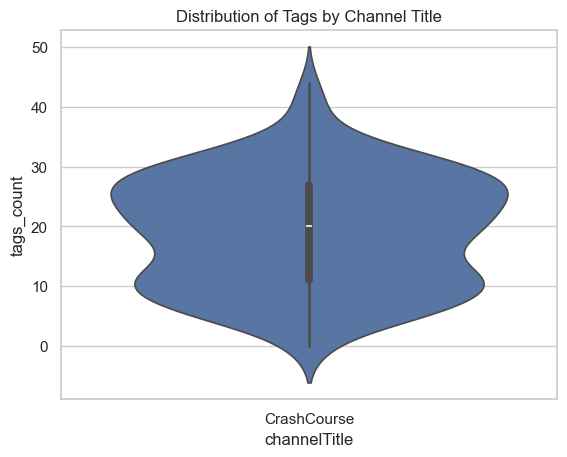

In [8]:
sns.set(style='whitegrid')
sns.violinplot(x="channelTitle", y="tags_count", data=df)
plt.title('Distribution of Tags by Channel Title')
plt.show()

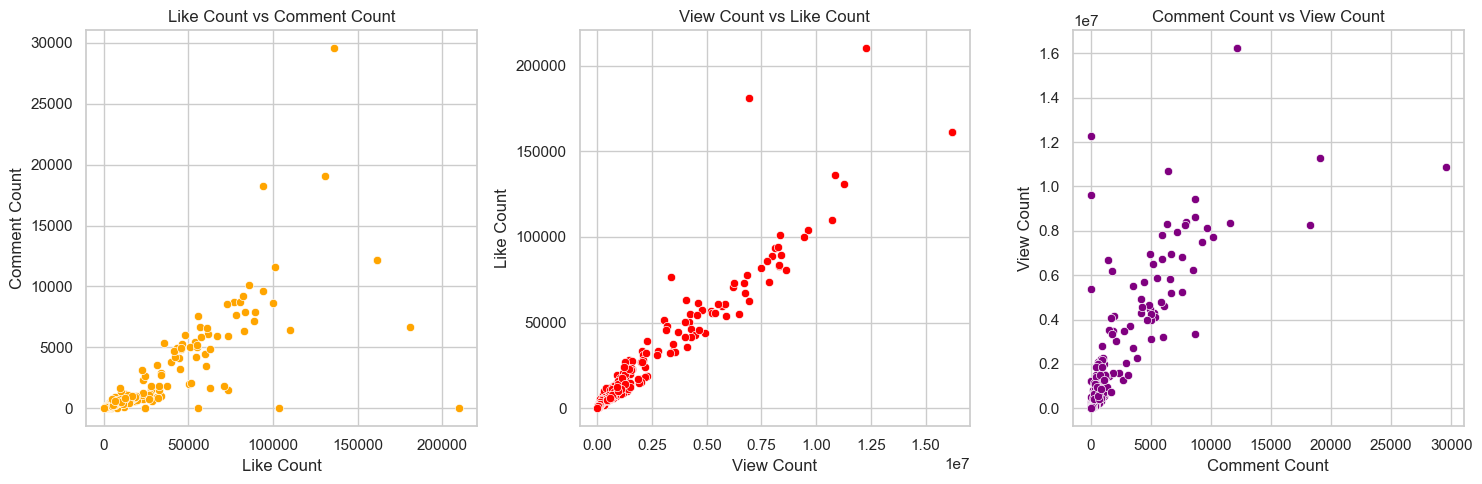

In [9]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sns.scatterplot(data = df, x = 'likeCount', y = 'commentCount', ax = ax[0], color='orange')
ax[0].set_xlabel('Like Count')
ax[0].set_ylabel('Comment Count')
ax[0].set_title('Like Count vs Comment Count')

sns.scatterplot(data = df, x = 'viewCount', y = 'likeCount', ax = ax[1], color='red')
ax[1].set_xlabel('View Count')
ax[1].set_ylabel('Like Count')
ax[1].set_title('View Count vs Like Count')

sns.scatterplot(data = df, x = 'commentCount', y = 'viewCount', ax = ax[2], color='purple')
ax[2].set_xlabel('Comment Count')
ax[2].set_ylabel('View Count')
ax[2].set_title('Comment Count vs View Count')

fig.tight_layout()
plt.show()

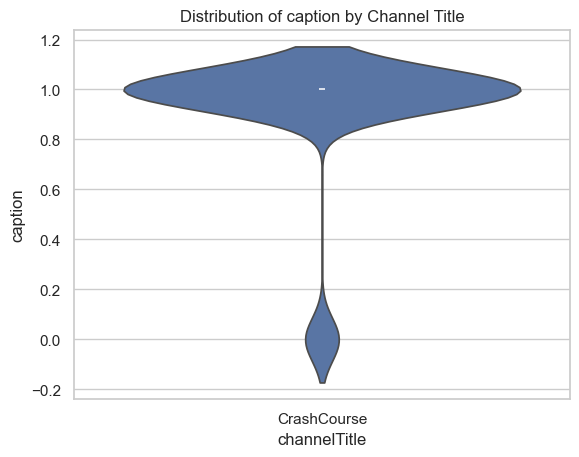

In [10]:
sns.set(style='whitegrid')
sns.violinplot(x="channelTitle", y="caption", data=df)
plt.title('Distribution of caption by Channel Title')
plt.show()

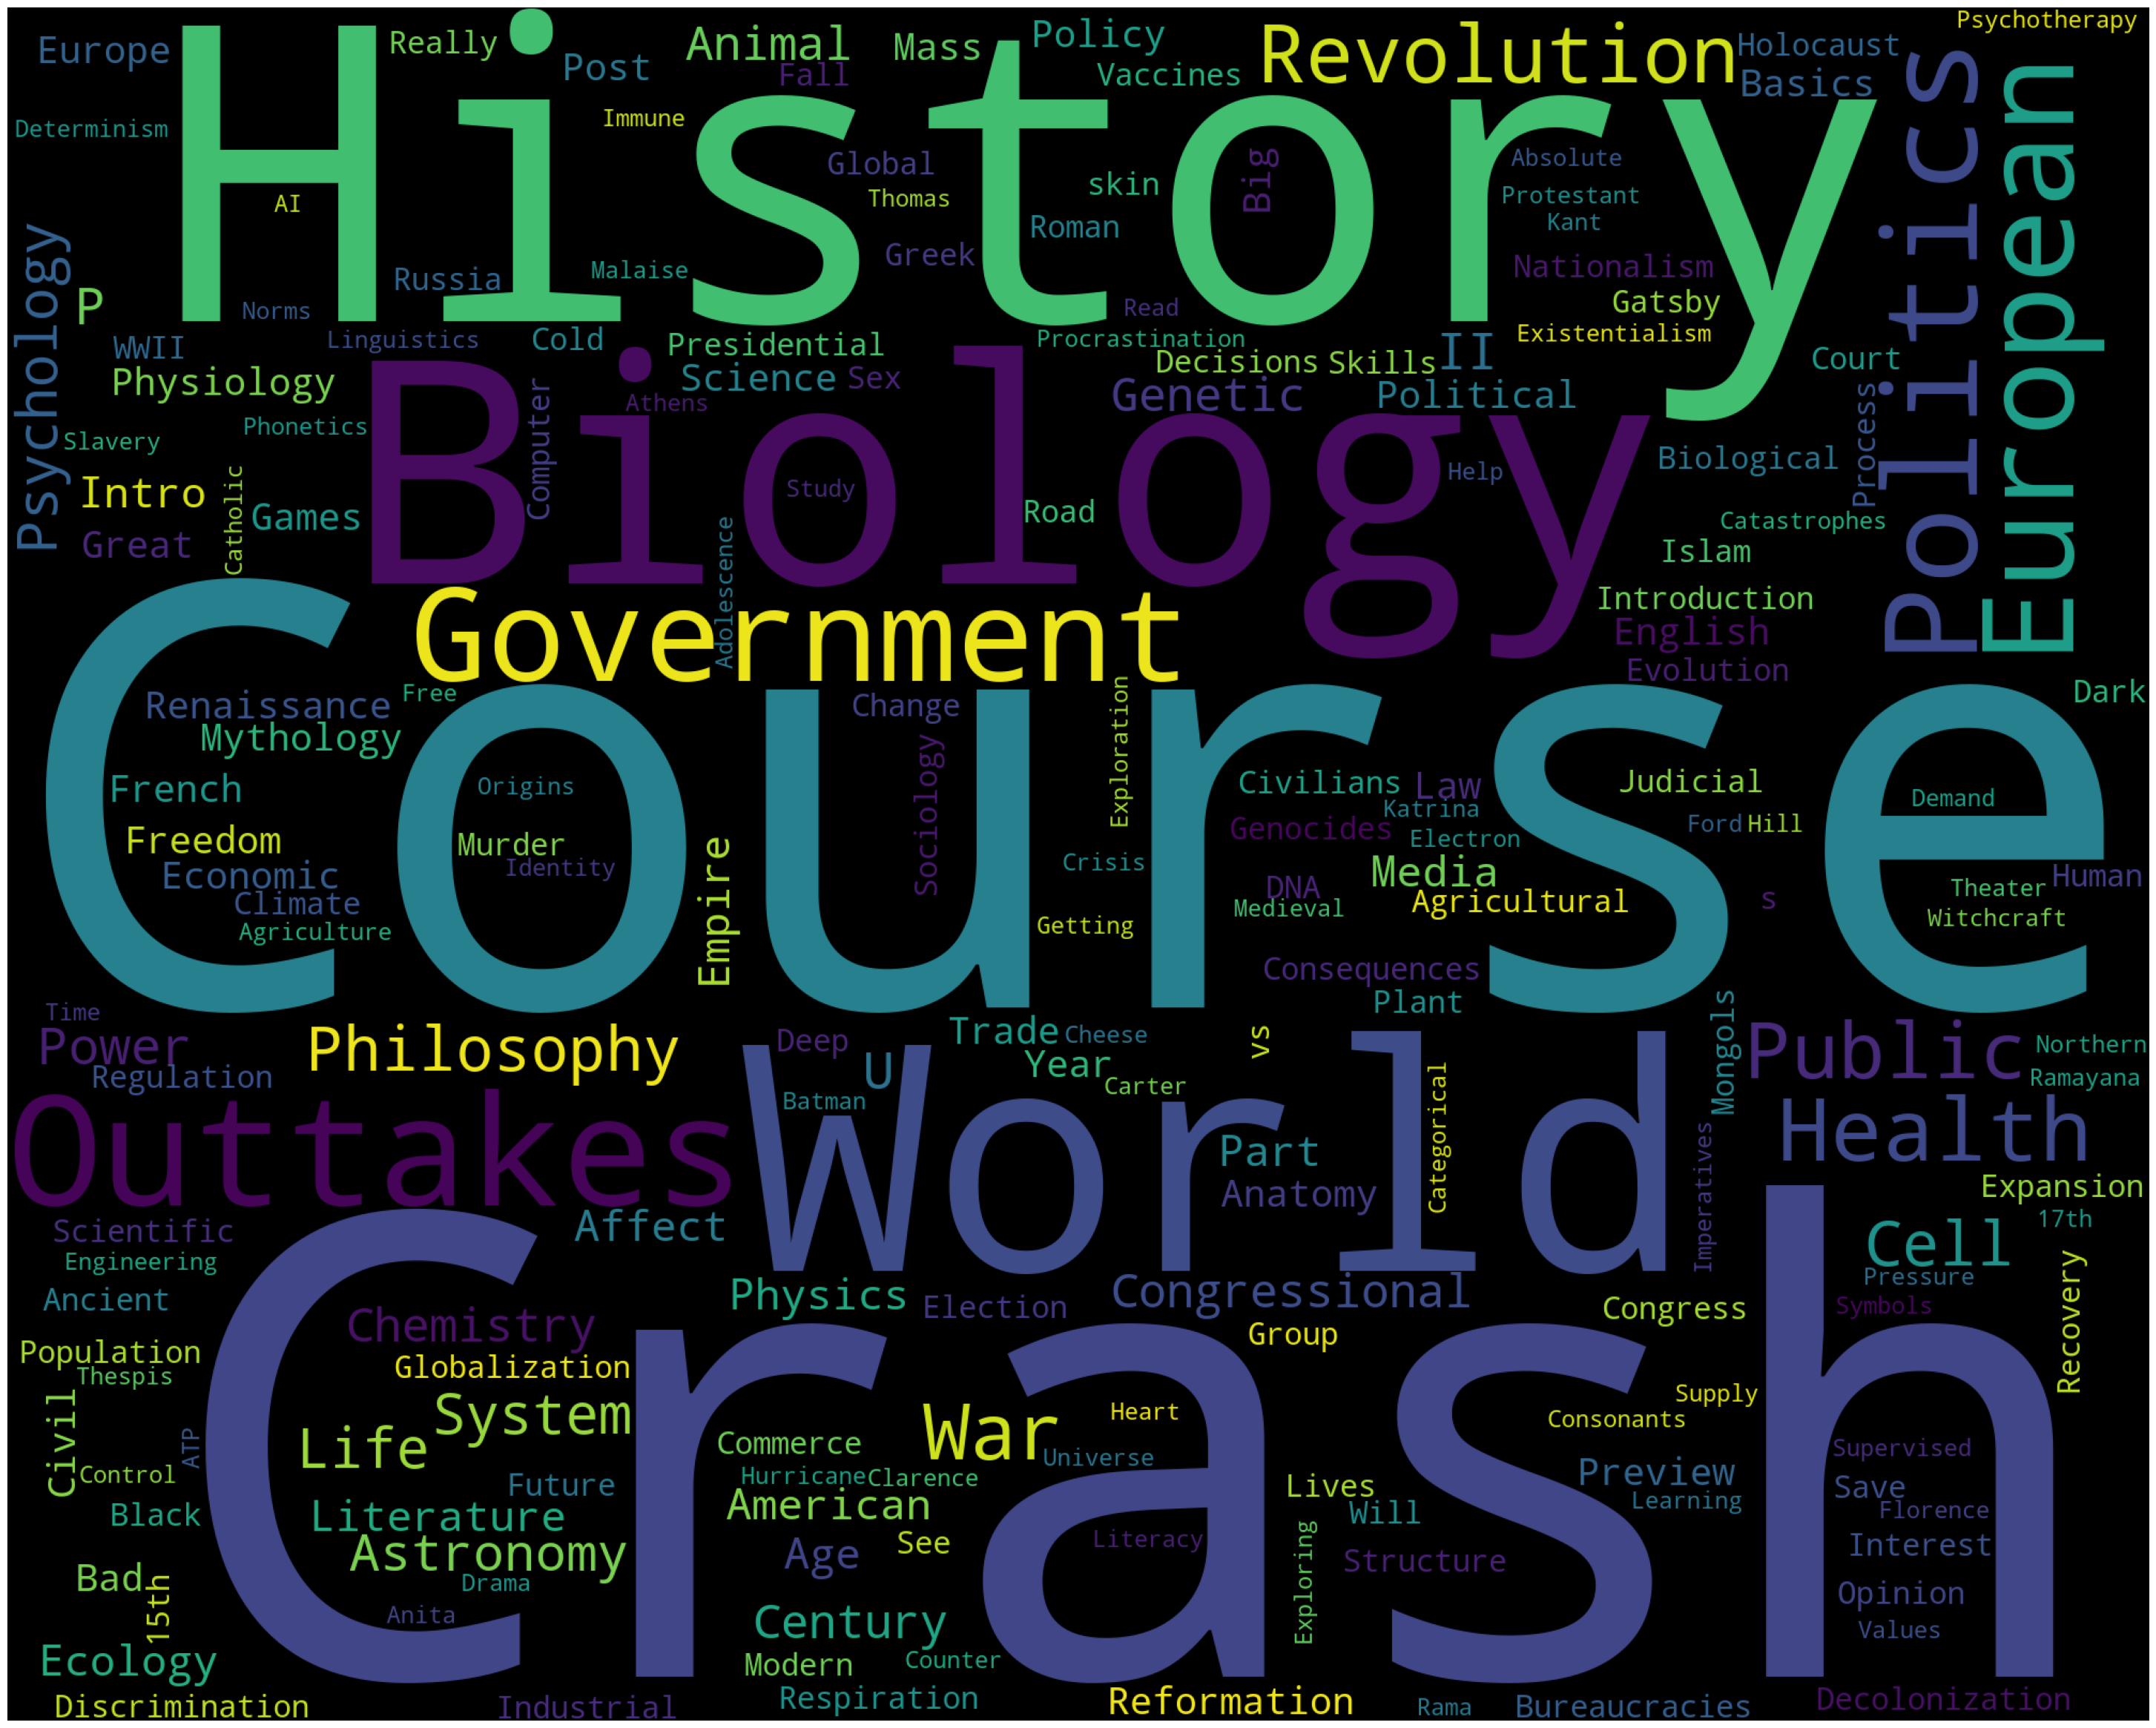

In [11]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(50, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1600, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [12]:
word_freq = Counter(all_words)

crash_freq = word_freq.get('crash', 0) + word_freq.get('Crash', 0)
course_freq = word_freq.get('course', 0) + word_freq.get('Course', 0)

print(f"Frequency of 'crash': {crash_freq} times")
print(f"Frequency of 'course': {course_freq} times")

Frequency of 'crash': 289 times
Frequency of 'course': 289 times


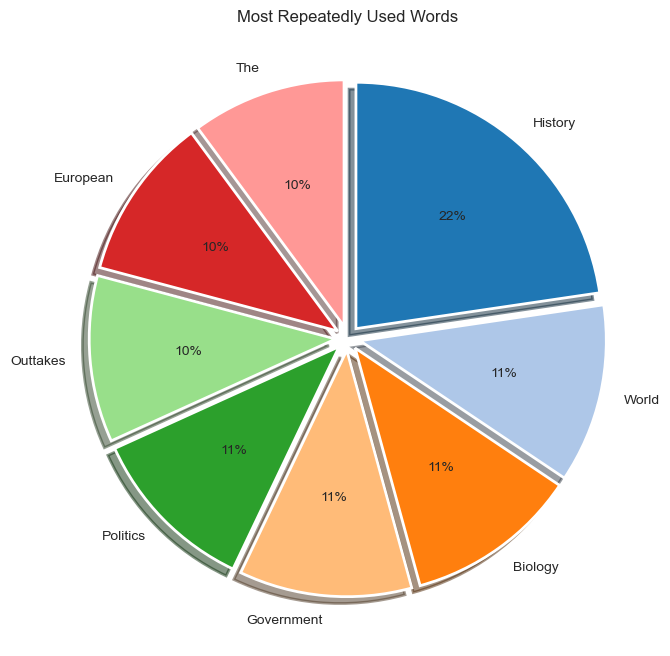

In [13]:
word_freq = Counter(all_words)
word_freq = Counter({k: v for k, v in word_freq.items() if k.lower() not in ['crash', 'course']})

most_common_words = word_freq.most_common()[:8]

plt.figure(figsize=(8, 8))
plt.pie([freq for word, freq in most_common_words], 
        labels=[word for word, freq in most_common_words], 
        autopct=lambda p : '{}%'.format(int(p)), 
        startangle=90, 
        colors=plt.cm.tab20(range(8)), 
        explode=[0.05]*8, 
        shadow=True, 
        textprops={'size': 'smaller'}, 
        counterclock=False, 
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title("Most Repeatedly Used Words")
plt.show()

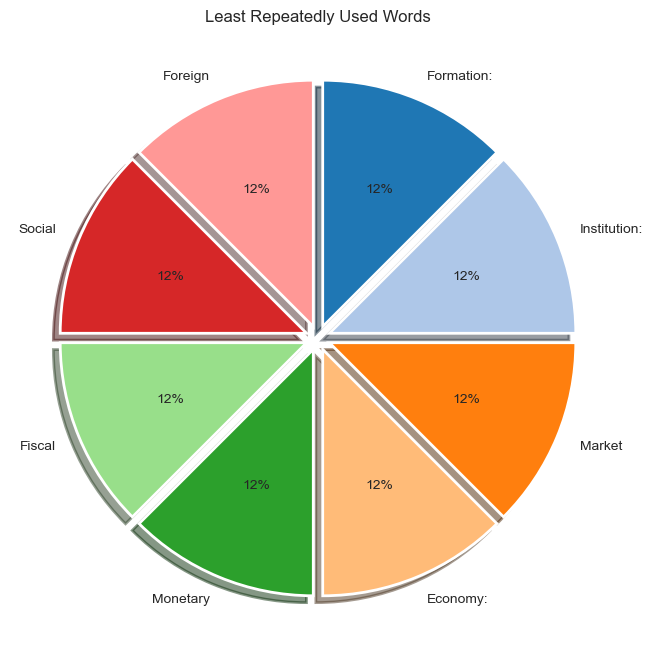

In [14]:
word_freq = Counter(all_words)
word_freq = Counter({k: v for k, v in word_freq.items() if k.lower() not in ['crash', 'course']})

least_common_words = word_freq.most_common()[-8:]

plt.figure(figsize=(8, 8))
plt.pie([freq for word, freq in least_common_words], 
        labels=[word for word, freq in least_common_words], 
        autopct=lambda p : '{}%'.format(int(p)), 
        startangle=90,
        colors=plt.cm.tab20(range(8)),
        explode=[0.05]*8,
        shadow=True,
        textprops={'size': 'smaller'},
        counterclock=False, 
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title("Least Repeatedly Used Words")
plt.show()